In [224]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import torch 
import numpy as np
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

In [225]:
digits = load_digits()

In [226]:
X = digits.images
y = digits.target

In [227]:
print(X.shape)
print(y.shape)

(1797, 8, 8)
(1797,)


In [228]:
train_x, val_x, train_y, val_y = train_test_split(X, y, stratify = y, test_size = 0.2)
#train_x = train_x[0:100]
#train_y = train_y[0:100]
print(train_y.shape)

(1437,)


In [229]:
train_x = torch.tensor(train_x, dtype=torch.float32)
train_y = torch.tensor(train_y)
val_x = torch.tensor(val_x, dtype=torch.float32)
x_reshaped = torch.flatten(train_x, start_dim=1)
val_x = torch.flatten(val_x, start_dim=1)
print(x_reshaped.shape)

torch.Size([1437, 64])


In [230]:
num_classes = 10

# One-hot encoding
one_hot = torch.zeros(len(train_y), num_classes)
one_hot.scatter_(1, train_y.unsqueeze(1), 1)

tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

The neural network consists of an input layer with 64 nodes, followed by two hidden layers with 32 and 16 nodes respectively. The final layer is a sigmoid activation function with 10 output nodes, each representing the probability of the model predicting one of the 10 possible numbers

In [231]:
class DigitPrediction(nn.Module):
    def __init__(self, input_size: int):
        super().__init__()
        self.l1 = nn.Linear(input_size, 32, dtype=torch.float32)
        self.l2 = nn.Linear(32, 10, dtype=torch.float32)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):
        out_prob = self.l2(self.l1(x))
        y_pred = self.softmax (out_prob)
        return y_pred

In [232]:
model = DigitPrediction(64)

In [233]:
loss_fn = nn.BCELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [234]:
no_of_epochs = 150
all_losses= []

for _ in range(no_of_epochs):
    y_pred = model(x_reshaped)
    max_index = torch.argmax(y_pred, dim=1).float()
    loss = loss_fn(y_pred, one_hot)
    all_losses.append(loss.detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



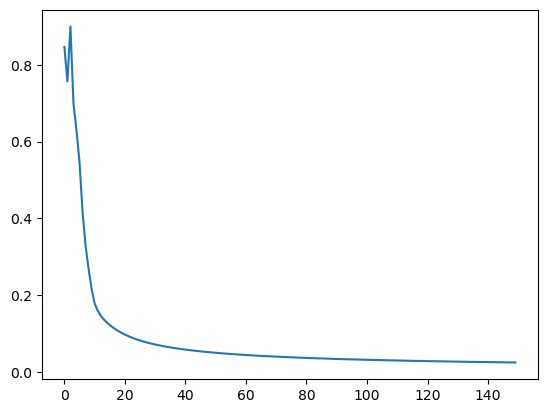

In [235]:
plt.plot(all_losses)

In [236]:
y_pred = model(val_x)
max_index = torch.argmax(y_pred, dim=1)

In [237]:
accuracy = accuracy_score(max_index, val_y)
print(accuracy)

0.9666666666666667
